# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Christian Herdiyanto Prasetia
- **Email:** christianherdiyanto@gmail.com
- **ID Dicoding:** tian_hp

## Menentukan Pertanyaan Bisnis

1. Bagaimana perubahan tingkat penyewaan sepeda di berbagai musim pada tahun 2011 dan 2012?
2. Bagaimana tren penyewaan sepeda pada hari kerja dibandingkan dengan hari libur di tahun 2011 dan 2012?
3. Apa dampak cuaca buruk, `weathersit` kategori 3 (*Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds*) dan kategori 4 (*Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog*), terhadap penyewaan sepeda selama hari kerja?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

Load dataset `hour.csv`

In [2]:
hour_dataset = pd.read_csv('data/hour.csv')
hour_dataset

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Infromasi Dataset `hour.csv`

In [3]:
hour_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Kedua dataset memiliki kolom yang hampir sama, hanya saja pada dataset `hour.csv` memiliki tambahan satu kolom yang berbeda yaitu kolom `hr` yang menunjukkan data waktu (jam) dari peminjaman sepeda
- Dataset `hour.csv` memiliki total *record*/data (baris) sebanyak 17379 data.
- Setelah menjalankan `hour_dataset.info()`, diperoleh bahwa pada seluruh kolom tidak terdapat nilai `null`.

### Assessing Data

Untuk memastikan kembali dataset yang digunakan sudah baik, dilakukan pengecekan sebagai berikut:
1. Pengecekan *Missing Value*
2. Pengecejan *Duplicate Data*

In [4]:
# Pengecekan missing value
hour_dataset.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
# Pengecekan duplicate data
hour_dataset.duplicated().sum()

0

**Insight:**
- Setelah dipastikan kembali, diperoleh bahwa dataset `hour.csv` tidak terdapat data `null` pada dataset. 
- Setelah dilakukan pengecekan *duplicate data*, diperoleh bahwa tidak terdapat data duplikat pada dataset. 

### Cleaning Data

Meskipun kondisi dataset yang telah dicek merupakan kondisi dataset yang baik, akan tetap dilakukan proses *cleaning data* untuk lebih memastikan dataset yang digunakan sudah baik.

In [6]:
# Penghapusan baris yang memiliki missing value
hour_dataset.dropna(axis=0, inplace=True)

# Penghapusan baris yang memiliki duplicate data
hour_dataset.drop_duplicates(inplace=True)

In [7]:
# Cek kembali informasi dataset
hour_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**

Setelah melalui proses *cleaning data*, dapat dilihat dataset tidak mengalami perubahan, yang mengindikasikan bahwa dataset memang sudah baik sejak awal.

## Exploratory Data Analysis (EDA)

### Explore Dataset 

---

#### Rangkuman Statistik Dataset

Dengan menggunakan fungsi `.describe()` dari library `pandas`, kita dapat memeperoleh Statistik deskriptif dari kolom-kolom yang bukan berupa data index dan data kategori. Statistik ini berguna untuk mendapatkan gambaran awal mengenai distribusi data pada setiap kolom, seperti nilai rata-rata, standar deviasi, nilai minimum, maksimum, dan kuartil.

In [8]:
hour_dataset[['temp','atemp','hum','windspeed','casual', 'registered', 'cnt']].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Total Penyewaan Sepeda per Musim pada Tahun 2011 dan 2012


In [9]:
# Total jumlah penyewaan sepeda per musim untuk tahun 2011 dan 2012
total_counts = hour_dataset.groupby(['season', 'yr'])['cnt'].sum().unstack()
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
year_mapping = {0: 2011, 1: 2012}
total_counts = total_counts.rename(index=season_mapping, columns=year_mapping)
    
total_counts

yr,2011,2012
season,,
Spring,150000,321348
Summer,347316,571273
Fall,419650,641479
Winter,326137,515476


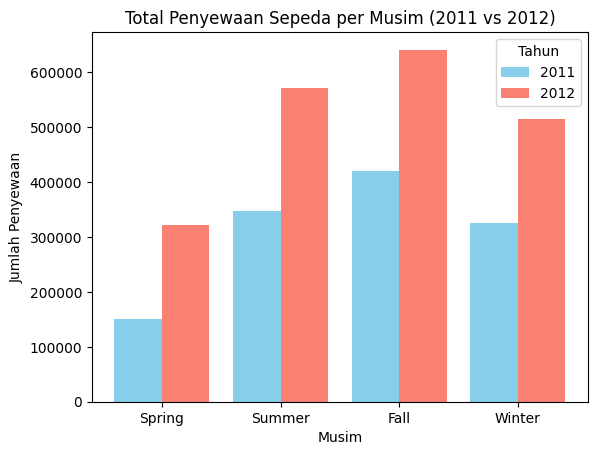

In [10]:
# Plot Diagram Batang
x = range(len(total_counts.index))
plt.bar([pos - 0.2 for pos in x], total_counts[2011], width=0.4, label='2011', color='skyblue')
plt.bar([pos + 0.2 for pos in x], total_counts[2012], width=0.4, label='2012', color='salmon')

plt.title("Total Penyewaan Sepeda per Musim (2011 vs 2012)")
plt.ylabel("Jumlah Penyewaan")
plt.xlabel("Musim")
plt.xticks(x, total_counts.index)
plt.legend(title="Tahun")
plt.show()

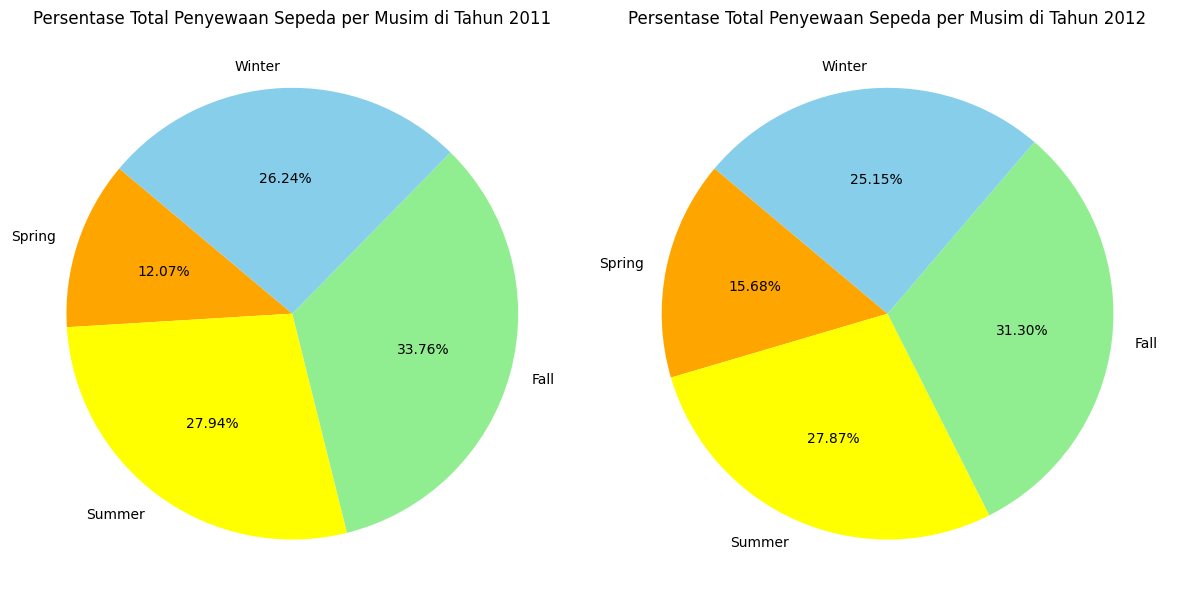

In [11]:
# Persentase total jumlah penyewaan sepeda per musim di tahun 2011
total_counts_2011 = total_counts[2011].sum()
percentage_counts_2011 = total_counts[2011] / total_counts_2011 * 100

# Persentase total jumlah penyewaan sepeda per musim di tahun 2012
total_counts_2012 = total_counts[2012].sum()
percentage_counts_2012 = total_counts[2012] / total_counts_2012 * 100

# Plot Diagram Pie
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.pie(percentage_counts_2011, labels=total_counts.index, autopct='%1.2f%%', startangle=140, colors=['orange', 'yellow', 'lightgreen', 'skyblue'])
ax1.set_title("Persentase Total Penyewaan Sepeda per Musim di Tahun 2011")
ax2.pie(percentage_counts_2012, labels=total_counts.index, autopct='%1.2f%%', startangle=140, colors=['orange', 'yellow', 'lightgreen', 'skyblue'])
ax2.set_title("Persentase Total Penyewaan Sepeda per Musim di Tahun 2012")
plt.tight_layout()
plt.show()

#### Rata-Rata Penyewaan Sepeda per Musim pada Tahun 2011 dan 2012


In [12]:
# Rata-rata jumlah penyewaan sepeda tiap jam per musim untuk tahun 2011 dan 2012
average_counts = hour_dataset.groupby(['season', 'yr'])['cnt'].mean().unstack()
average_counts = average_counts.rename(index=season_mapping, columns=year_mapping)
    
average_counts

yr,2011,2012
season,,
Spring,72.533849,147.814167
Summer,157.655924,258.963282
Fall,187.343750,284.343528
Winter,152.828960,245.698761


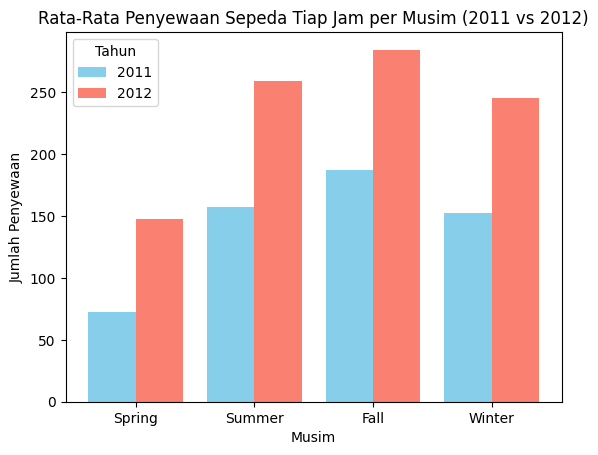

In [13]:
# Plot Diagram Batang
x = range(len(average_counts.index))
plt.bar([pos - 0.2 for pos in x], average_counts[2011], width=0.4, label='2011', color='skyblue')
plt.bar([pos + 0.2 for pos in x], average_counts[2012], width=0.4, label='2012', color='salmon')

plt.title("Rata-Rata Penyewaan Sepeda Tiap Jam per Musim (2011 vs 2012)")
plt.ylabel("Jumlah Penyewaan")
plt.xlabel("Musim")
plt.xticks(x, average_counts.index)
plt.legend(title="Tahun")
plt.show()

**Insight:**
- Diperoleh bahwa terjadi peningkatan jumlah penyewaan sepeda dari tahun 2011 ke 2012, dimana jumlah peningkatan juga terjadi untuk setiap musim.
- Rata-rata penyewaan sepeda tiap jam juga meningkat dari tahun 2011 ke 2012 untuk setiap musimnya.
- Tingkat penyewaan sepeda tertinggi selalu terjadi pada musim `Fall` dan tingkat penyewaan sepeda terendah selalu terjadi pada musim `Spring`.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

#### Bagaimana perubahan tingkat penyewaan sepeda di berbagai musim pada tahun 2011 dan 2012?

##### Melalui Proses EDA Sebelumnya, Diperoleh Informasi sebagai berikut:

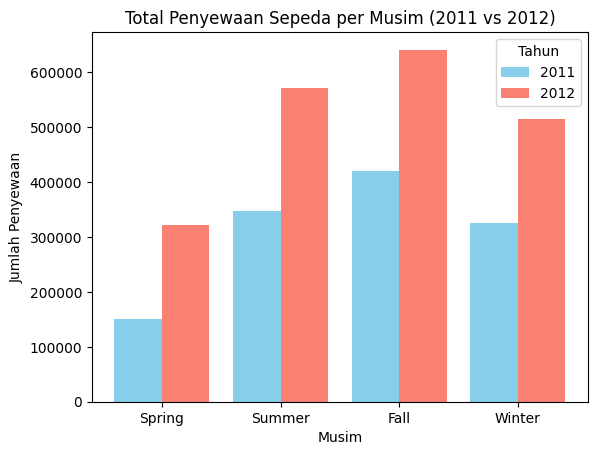

In [14]:
x = range(len(total_counts.index))
plt.bar([pos - 0.2 for pos in x], total_counts[2011], width=0.4, label='2011', color='skyblue')
plt.bar([pos + 0.2 for pos in x], total_counts[2012], width=0.4, label='2012', color='salmon')

plt.title("Total Penyewaan Sepeda per Musim (2011 vs 2012)")
plt.ylabel("Jumlah Penyewaan")
plt.xlabel("Musim")
plt.xticks(x, total_counts.index)
plt.legend(title="Tahun")
plt.show()

##### Peresentase peningkatan jumlah penywaan per musim dari tahun 2011 ke 2012 ditunjukkan sebagai berikut:

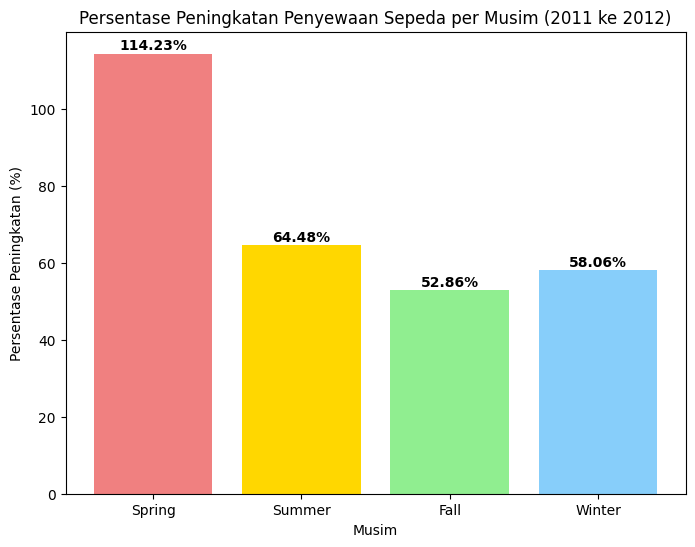

In [15]:
# Persentase peningkatan penyewaan dari 2011 ke 2012 untuk setiap musim
percentage_increase = ((total_counts[2012] - total_counts[2011]) / total_counts[2011]) * 100

# Plot Persentase Peningkatan Penyewaan Sepeda per Musim
plt.figure(figsize=(8, 6))
plt.bar(total_counts.index, percentage_increase, color=['lightcoral', 'gold', 'lightgreen', 'lightskyblue'])
plt.title("Persentase Peningkatan Penyewaan Sepeda per Musim (2011 ke 2012)")
plt.xlabel("Musim")
plt.ylabel("Persentase Peningkatan (%)")
for i, v in enumerate(percentage_increase):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontweight='bold')
plt.show()

### Pertanyaan 2:

#### Bagaimana tren penyewaan sepeda pada hari kerja dibandingkan dengan hari libur di tahun 2011 dan 2012?

In [16]:
# Total jumlah penyewaan sepeda Weekend dan Weekdays untuk tahun 2011 dan 2012
total_counts_weekday_weekend = hour_dataset.groupby(['workingday', 'yr'])['cnt'].sum().unstack()
workingday_mapping = {0: 'Weekend', 1: 'Weekday'}
total_counts_weekday_weekend = total_counts_weekday_weekend.rename(index=workingday_mapping, columns=year_mapping)
total_counts_weekday_weekend

yr,2011,2012
workingday,,
Weekend,386839,613430
Weekday,856264,1436146


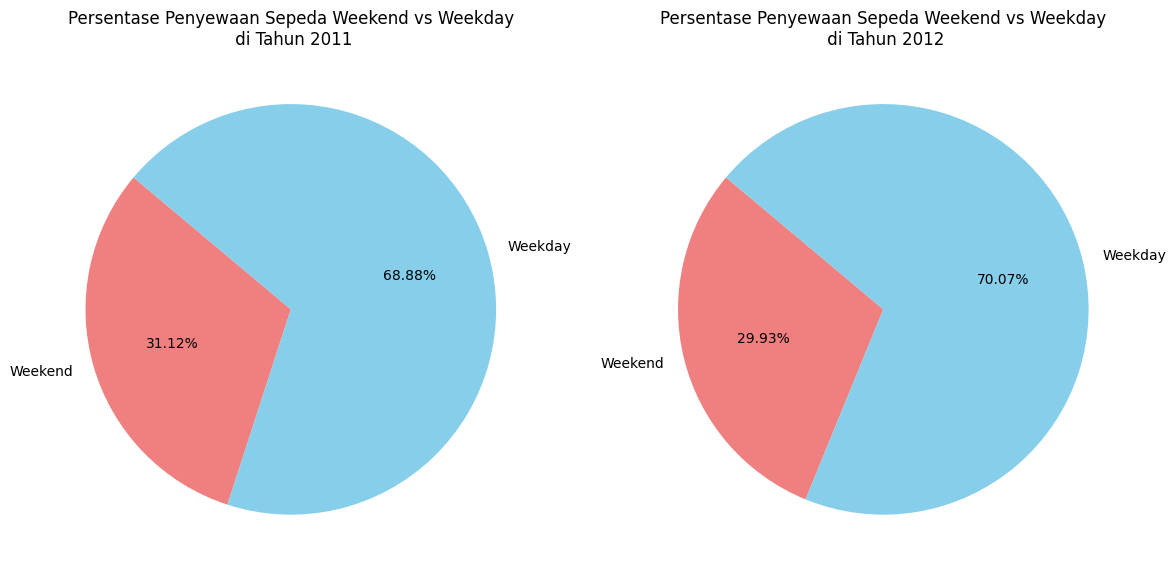

In [17]:
# Persentase total jumlah penyewaan sepeda weekend dan weekday di tahun 2011
total_counts_2011_weekday_weekend = total_counts_weekday_weekend[2011].sum()
percentage_weekday_weekend_2011 = total_counts_weekday_weekend[2011] / total_counts_2011_weekday_weekend * 100

# Persentase total jumlah penyewaan sepeda weekend dan weekday di tahun 2012
total_counts_2012_weekday_weekend = total_counts_weekday_weekend[2012].sum()
percentage_weekday_weekend_2012 = total_counts_weekday_weekend[2012] / total_counts_2012_weekday_weekend * 100

# Plot Diagram Pie
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.pie(percentage_weekday_weekend_2011, labels=total_counts_weekday_weekend.index, autopct='%1.2f%%', startangle=140, colors=['lightcoral', 'skyblue'])
ax1.set_title("Persentase Penyewaan Sepeda Weekend vs Weekday\n di Tahun 2011")
ax2.pie(percentage_weekday_weekend_2012, labels=total_counts_weekday_weekend.index, autopct='%1.2f%%', startangle=140, colors=['lightcoral', 'skyblue'])
ax2.set_title("Persentase Penyewaan Sepeda Weekend vs Weekday\n di Tahun 2012")
plt.tight_layout()
plt.show()

### Pertanyaan 3:

#### Apa dampak cuaca buruk, `weathersit` kategori 3 (*Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds*) dan kategori 4 (*Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog*), terhadap penyewaan sepeda selama hari kerja?

In [18]:
# Buat Kategori 1 dan 2 sebagai Cuaca Baik, dan Kategori 3 dan 4 sebagai Cuaca Buruk
hour_dataset_new = hour_dataset.copy()
hour_dataset_new['weathersit'] = hour_dataset_new['weathersit'].replace({1: 0, 2: 0, 3: 1, 4: 1})
weathersit_mapping = {0: 'Good Weather', 1: 'Bad Weather'}

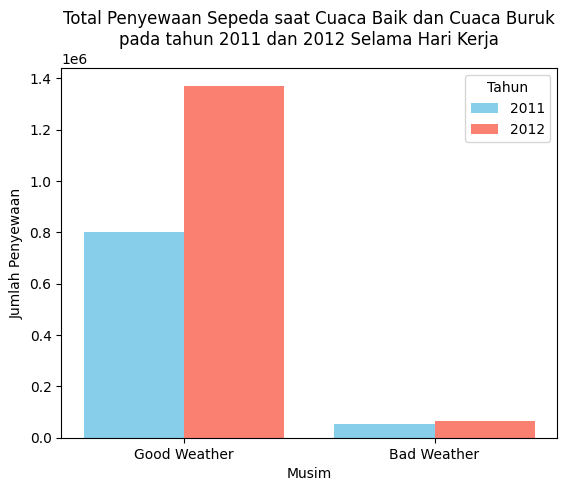

In [19]:
# Hitung total jumlah penyewaan sepeda untuk cuaca baik dan cuaca buruk pada hari kerja untuk tahun 2011 dan 2012
total_counts_by_weather = hour_dataset_new.where(hour_dataset_new['workingday'] == 1).groupby(['weathersit', 'yr'])['cnt'].sum().unstack()
total_counts_by_weather = total_counts_by_weather.rename(index=weathersit_mapping, columns=year_mapping)

x = range(len(total_counts_by_weather.index))
plt.bar([pos - 0.2 for pos in x], total_counts_by_weather[2011], width=0.4, label='2011', color='skyblue')
plt.bar([pos + 0.2 for pos in x], total_counts_by_weather[2012], width=0.4, label='2012', color='salmon')

plt.title("Total Penyewaan Sepeda saat Cuaca Baik dan Cuaca Buruk\npada tahun 2011 dan 2012 Selama Hari Kerja")
plt.ylabel("Jumlah Penyewaan")
plt.xlabel("Musim")
plt.xticks(x, total_counts_by_weather.index)
plt.legend(title="Tahun")
plt.show()

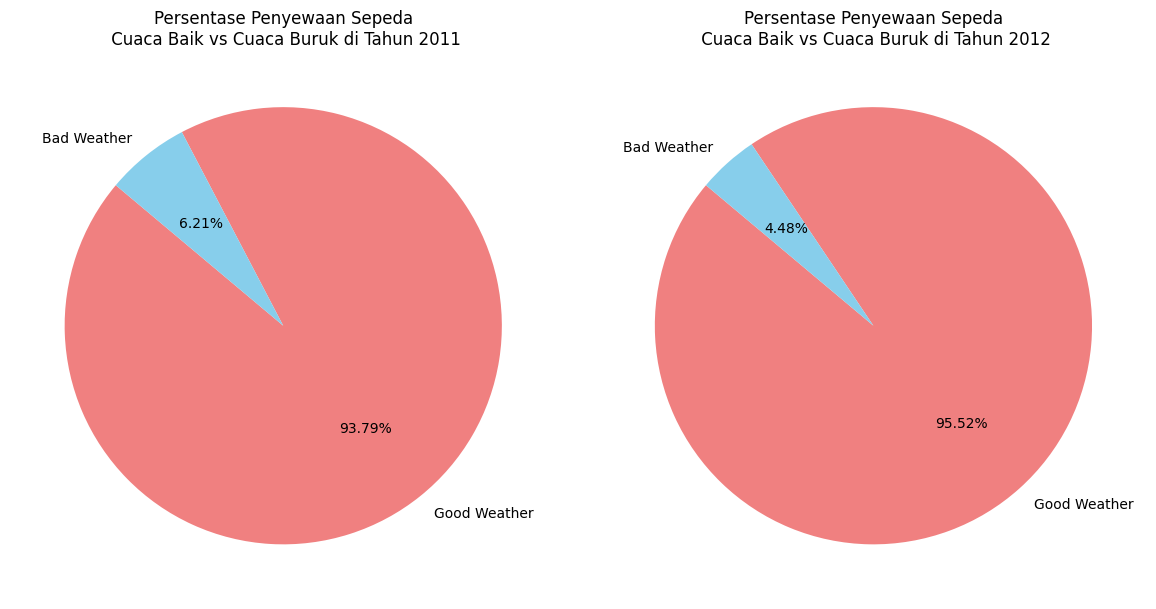

In [20]:
# Persentase total jumlah penyewaan sepeda weekend dan weekday di tahun 2011
total_counts_by_weather_2011 = total_counts_by_weather[2011].sum()
percentage_weather_2011 = total_counts_by_weather[2011] / total_counts_by_weather_2011 * 100

# Persentase total jumlah penyewaan sepeda weekend dan weekday di tahun 2012
total_counts_by_weather_2012 = total_counts_by_weather[2012].sum()
percentage_weather_2012 = total_counts_by_weather[2012] / total_counts_by_weather_2012 * 100

# Plot Diagram Pie
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.pie(percentage_weather_2011, labels=total_counts_by_weather.index, autopct='%1.2f%%', startangle=140, colors=['lightcoral', 'skyblue'])
ax1.set_title("Persentase Penyewaan Sepeda\n Cuaca Baik vs Cuaca Buruk di Tahun 2011")
ax2.pie(percentage_weather_2012, labels=total_counts_by_weather.index, autopct='%1.2f%%', startangle=140, colors=['lightcoral', 'skyblue'])
ax2.set_title("Persentase Penyewaan Sepeda\n Cuaca Baik vs Cuaca Buruk di Tahun 2012")
plt.tight_layout()
plt.show()

## Analisis Lanjutan (Opsional)

### *Clustering* dengan Teknik Binning

Pada bagian ini, teknik *binning* akan digunakan untuk melakukan segmentasi pada dataset berdasarkan data pada kolom `cnt` ke dalam beberapa kategori, yaitu `Rendah`, `Menengah`, dan `Tinggi`.

In [21]:
# Informasi total jumlah penywaaan sepeda tiap jam
counts = hour_dataset['cnt'].describe()
counts

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

In [22]:
# Menentukan batas untuk pengelompokan
cnt_bins = [0, counts['25%'], counts['75%'], counts['max']] 

# Menentukan label untuk setiap kelompok
cnt_labels = ['Rendah', 'Menengah', 'Tinggi']

# Binning berdasarkan jumlah penyewaan (cnt) untuk mengelompokkan menjadi Rendah, Menengah, Tinggi
hour_dataset['Tingkat Penyewaan'] = pd.cut(hour_dataset['cnt'], bins=cnt_bins, labels=cnt_labels)

In [23]:
hour_dataset[['dteday','hr','cnt', 'Tingkat Penyewaan']]

,dteday,hr,cnt,Tingkat Penyewaan
0,2011-01-01,0,16,Rendah
1,2011-01-01,1,40,Rendah
2,2011-01-01,2,32,Rendah
3,2011-01-01,3,13,Rendah
4,2011-01-01,4,1,Rendah
...,...,...,...,...
17374,2012-12-31,19,119,Menengah
17375,2012-12-31,20,89,Menengah
17376,2012-12-31,21,90,Menengah
17377,2012-12-31,22,61,Menengah


#### Presentase data antara Tingkat Penyewaan `Rendah`, `Menengah`, dan `Tinggi`

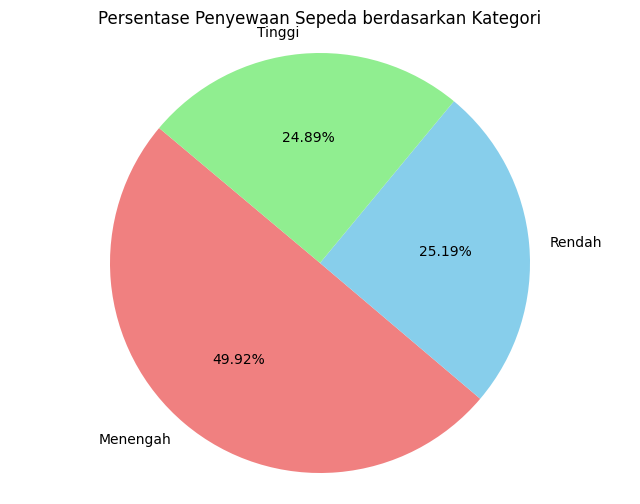

In [24]:
# Hitung jumlah untuk setiap kategori Tingkat Penyewaan
category_counts = hour_dataset['Tingkat Penyewaan'].value_counts()

# Plot Diagram Pie
plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.2f%%', startangle=140, colors=['lightcoral', 'skyblue', 'lightgreen'])
plt.title('Persentase Penyewaan Sepeda berdasarkan Kategori')
plt.axis('equal')
plt.show()

## Conclusion

- Terjadi **peningkatan jumlah penyewaan** sepeda dari tahun 2011 ke 2012 **di setiap musimnya**. Tingkat penyewaan sepeda **tertinggi selalu terjadi di musim** `Fall` tiap tahunnya.
- Tren penyewaan sepeda pada **hari kerja (weekdays) jauh lebih tinggi daripada saat hari libur**, baik di tahun 2011 maupun di tahun 2012.
- **Cuaca buruk pada hari kerja (weekdays) sangat berdampak pada tingkat penyewaan sepeda**. Dapat dilihat bahwa jumlah penyewaan sepeda, baik pada tahun 2011 maupun 2012, memiliki selisih yang sangat jauh berbeda antara saat **Cuaca Baik** dan **Cuaca Buruk** pada hari kerja.